In [1]:
import pandas as pd
import numpy as np

In [2]:
df_artist_collab = pd.read_csv("/Users/anushkavuppala/Documents/Anushka/GWU/Fall 2023/Capstone/Music dataset/Artist Collaboration Network/global/entire-table-preprocessing.csv",converters={"song_ids": lambda x: x.strip("[]").replace("'","").split(", ")})
df_artist_collab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   artist_1  3061 non-null   object
 1   artist_2  3061 non-null   object
 2   count     3061 non-null   int64 
 3   song_ids  3061 non-null   object
dtypes: int64(1), object(3)
memory usage: 95.8+ KB


In [3]:
df_artist_collab = df_artist_collab.explode('song_ids',ignore_index=True)
df_artist_collab


,artist_1,artist_2,count,song_ids
0,Dalex,Lenny Tavárez,11,1Xnn1TPyr5h0hpRAT4B4EA
1,Dalex,Lenny Tavárez,11,5Id5B3dxJZhPcV9GzgYZZe
2,Dalex,Lenny Tavárez,11,7anSoGdgtmJTAPZBzcPhO6
3,Dalex,Lenny Tavárez,11,224EVTFiLsdQignUFLvDeH
4,Dalex,Lenny Tavárez,11,1tpbAGsGpZee5jDHMcLrUJ
...,...,...,...,...
4185,Manuel Turizo,Zion & Lennox,1,2ktoFujjJtantyMoVdBJlX
4186,Kelsea Ballerini,The Chainsmokers,1,4NBTZtAt1F13VvlSKe6KTl
4187,Apache 207,Sido,1,2u8AXJyk8pICzj2wyPBL0b
4188,21 Savage,Metro Boomin,1,0AluA5RNsa4Cx6XRhf2hWZ


In [4]:
# %%
df_artist_collab.drop('count', axis=1,inplace=True)
df_artist_collab.rename(columns={"song_ids":"song_id"},inplace=True)
df_artist_collab



,artist_1,artist_2,song_id
0,Dalex,Lenny Tavárez,1Xnn1TPyr5h0hpRAT4B4EA
1,Dalex,Lenny Tavárez,5Id5B3dxJZhPcV9GzgYZZe
2,Dalex,Lenny Tavárez,7anSoGdgtmJTAPZBzcPhO6
3,Dalex,Lenny Tavárez,224EVTFiLsdQignUFLvDeH
4,Dalex,Lenny Tavárez,1tpbAGsGpZee5jDHMcLrUJ
...,...,...,...
4185,Manuel Turizo,Zion & Lennox,2ktoFujjJtantyMoVdBJlX
4186,Kelsea Ballerini,The Chainsmokers,4NBTZtAt1F13VvlSKe6KTl
4187,Apache 207,Sido,2u8AXJyk8pICzj2wyPBL0b
4188,21 Savage,Metro Boomin,0AluA5RNsa4Cx6XRhf2hWZ


In [5]:
# %%
df_song = pd.read_csv("/Users/anushkavuppala/Documents/Anushka/GWU/Fall 2023/Capstone/Music dataset/Hit Songs/spotify_hits_dataset_complete.csv",converters={"artist_name": lambda x: x.strip("[]").replace("'","").split(", ")},sep="\t")
df_song = df_song[df_song["song_type"] != "Solo"]
df_song = df_song.reset_index(drop=True)

#df_song.drop("index",inplace=True)
df_song.head()

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,3,0.0209,0.614,0.6410,0.000000,0.0659,-6.751,0.2880,0.4920,123.539
1,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,4,0.9690,0.150,0.0577,0.363000,0.0873,-21.255,0.0362,0.0701,71.564
2,2Wr970IfovsSGnfkE08iMF,Find Me,"['01pKrlgPJhm5dB4lneYAqS', '2WX2uTcsvV5OnS0inA...","[Sigma, Birdy]",4,False,Collaboration,1,2,0,...,4,0.0640,0.572,0.7970,0.000000,0.1050,-3.995,0.0483,0.2520,135.006
3,2kPpxNSgXRvu5yqkRLKJIu,Winter Wonderland / Don't Worry Be Happy (feat...,"['26AHtbjWKiwYzsoGoUZq53', '1vSN1fsvrzpbttOYGs...","[Pentatonix, Tori Kelly]",45,False,Collaboration,4,2,78,...,4,0.2800,0.610,0.3970,0.000000,0.0833,-8.506,0.0504,0.7180,129.761
4,5sCwso3aURYAdieWEFI1nE,Icy (feat. Gucci Mane),"['4xRYI6VqpkE3UwrDrAZL8L', '13y7CgLHjMVRMDqxdx...","[Logic, Gucci Mane]",3,True,Collaboration,9,2,0,...,4,0.1630,0.827,0.5220,0.000001,0.1090,-4.866,0.0845,0.4770,151.990


In [6]:
df_song.shape

(4987, 24)

# Artist table load

In [7]:
df_artists=pd.read_csv("/Users/anushkavuppala/Documents/Anushka/GWU/Fall 2023/Capstone/Music dataset/Artists/spotify_artists_info_complete.csv", sep="\t")
df_artists.drop("image_url",axis=1,inplace=True)
df_artists.rename(columns={"name":"artist_name"},inplace=True)
df_artists.head()

,artist_id,artist_name,followers,popularity,genres
0,1WgXqy2Dd70QQOU7Ay074N,AURORA,923204,75,['norwegian pop']
1,2dXKh2aHr7RS2RVPlWJoUS,MHD,2707,24,[]
2,293zczrfYafIItmnmM3coR,Chuck Berry,1103439,67,"['blues rock', 'classic rock', 'folk rock', 'r..."
3,4DqRDyrUuJO8CuxfgVCU3m,Hasan.K,38,29,[]
4,1U5zgr455OGyIkLNXvDdrf,Traditional,26672,64,['sleep']


# Combining as 2 artist per song

In [8]:
import pandas as pd
from itertools import combinations

# Assuming merged_df is the DataFrame with columns artist_1, artist_2, and artist_name

# Create an empty list to store the new DataFrames
new_dfs = []

# Define a function to process each row
def fill_artists(row):
    artists_list = row['artist_name']
    if artists_list:
        if len(artists_list) == 2:
            # If there are 2 artists, fill artist_1 and artist_2 accordingly
            row['artist_1'] = artists_list[0]
            row['artist_2'] = artists_list[1]
            new_dfs.append(row.to_frame().transpose())
        elif len(artists_list) > 2:
            # If there are more than 2 artists, create new rows for each combination
            top_artists = sorted(artists_list, key=lambda x: df_artists[df_artists['artist_name'].isin(artists_list)]['followers'].max(), reverse=True)[:2]
            row['artist_1'] = top_artists[0]
            row['artist_2'] = top_artists[1]
            new_dfs.append(row.to_frame().transpose())
    else:
        new_dfs.append(row.to_frame().transpose())

# Apply the function to each row of the DataFrame
df_song.apply(fill_artists, axis=1)

# Concatenate the new DataFrames into a single DataFrame
new_rows_df = pd.concat(new_dfs, ignore_index=True)

# Print the updated DataFrame
print(new_rows_df)

                     song_id  \
0     0MET90crciVlxlE07ub7Rn   
1     6FxCPvx8Ovm9y77DO6vuy5   
2     2Wr970IfovsSGnfkE08iMF   
3     2kPpxNSgXRvu5yqkRLKJIu   
4     5sCwso3aURYAdieWEFI1nE   
...                      ...   
4982  26bMmC90QF0FOd1ctDnkeU   
4983  1oBsrVp5CpLVpxX0WdHQvt   
4984  4W598w0KcHVG5Nwqk0qMpj   
4985  3at8iNHLzE5EizkFWoQzCK   
4986  2Gl0FzuLxflY6nPifJp5Dr   

                                              song_name  \
0                          Good Love (feat. Tory Lanez)   
1     Main Title "Somewhere in My Memory" (From "Hom...   
2                                               Find Me   
3     Winter Wonderland / Don't Worry Be Happy (feat...   
4                                Icy (feat. Gucci Mane)   
...                                                 ...   
4982                                  Mulherão da Porra   
4983                                             Dealer   
4984                                              Three   
4985                     

In [9]:
new_rows_df

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez
1,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.15,0.0577,0.363,0.0873,-21.255,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra
2,2Wr970IfovsSGnfkE08iMF,Find Me,"['01pKrlgPJhm5dB4lneYAqS', '2WX2uTcsvV5OnS0inA...","[Sigma, Birdy]",4,False,Collaboration,1,2,0,...,0.572,0.797,0.0,0.105,-3.995,0.0483,0.252,135.006,Sigma,Birdy
3,2kPpxNSgXRvu5yqkRLKJIu,Winter Wonderland / Don't Worry Be Happy (feat...,"['26AHtbjWKiwYzsoGoUZq53', '1vSN1fsvrzpbttOYGs...","[Pentatonix, Tori Kelly]",45,False,Collaboration,4,2,78,...,0.61,0.397,0.0,0.0833,-8.506,0.0504,0.718,129.761,Pentatonix,Tori Kelly
4,5sCwso3aURYAdieWEFI1nE,Icy (feat. Gucci Mane),"['4xRYI6VqpkE3UwrDrAZL8L', '13y7CgLHjMVRMDqxdx...","[Logic, Gucci Mane]",3,True,Collaboration,9,2,0,...,0.827,0.522,0.000001,0.109,-4.866,0.0845,0.477,151.99,Logic,Gucci Mane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,26bMmC90QF0FOd1ctDnkeU,Mulherão da Porra,"['0OWtaM1z81DliQXntU4KaN', '6OpOg5HVCc8xVf7OVr...","[Munhoz & Mariano, Jerry Smith]",48,True,Collaboration,1,2,79,...,0.811,0.696,0.0,0.196,-5.209,0.0553,0.44,128.031,Munhoz & Mariano,Jerry Smith
4983,1oBsrVp5CpLVpxX0WdHQvt,Dealer,"['10XY9PZCJKzUFzZOdtlQLU', '0b62itBWBdLgiecXjX...","[LX, Maxwell]",0,True,Collaboration,1,2,0,...,0.614,0.763,0.0,0.19,-5.75,0.394,0.376,128.069,LX,Maxwell
4984,4W598w0KcHVG5Nwqk0qMpj,Three,"['1RyvyyTE3xzB2ZywiAwp0i', '50co4Is1HCEo8bhOyU...","[Future, Young Thug]",51,True,Collaboration,2,2,69,...,0.725,0.692,0.0,0.0912,-5.742,0.257,0.298,169.025,Future,Young Thug
4985,3at8iNHLzE5EizkFWoQzCK,Nana,"['62zLrboqOTPyozwi721CVy', '74tb4BL2gQ28BJicVA...","[Lorenzo, LES ANTICIPATEURS]",52,True,Collaboration,7,2,79,...,0.755,0.737,0.0,0.116,-5.77,0.0505,0.753,145.961,Lorenzo,LES ANTICIPATEURS


In [10]:
new_rows_df.isna().sum()

song_id                   0
song_name                18
artist_id                 0
artist_name               0
popularity                0
explicit                  0
song_type                 0
track_number              0
num_artists               0
num_available_markets     0
release_date              0
duration_ms               0
key                       0
mode                      0
time_signature            0
acousticness              0
danceability              0
energy                    0
instrumentalness          0
liveness                  0
loudness                  0
speechiness               0
valence                   0
tempo                     0
artist_1                  0
artist_2                  0
dtype: int64

In [11]:
new_rows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   song_id                4987 non-null   object
 1   song_name              4969 non-null   object
 2   artist_id              4987 non-null   object
 3   artist_name            4987 non-null   object
 4   popularity             4987 non-null   object
 5   explicit               4987 non-null   object
 6   song_type              4987 non-null   object
 7   track_number           4987 non-null   object
 8   num_artists            4987 non-null   object
 9   num_available_markets  4987 non-null   object
 10  release_date           4987 non-null   object
 11  duration_ms            4987 non-null   object
 12  key                    4987 non-null   object
 13  mode                   4987 non-null   object
 14  time_signature         4987 non-null   object
 15  acousticness         

In [12]:
new_rows_df[new_rows_df['song_name'].isna()]

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2
235,5TTzhRSWQS4Yu8xTgAuq6D,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,13,2,0,...,0.465,0.82,0.0,0.0888,-5.907,0.307,0.505,86.839,,
486,5rbXOUQCaYcSnW5EOgfVaD,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,19,2,0,...,0.789,0.794,0.0,0.108,-5.876,0.1,0.334,108.852,,
596,4nbg6j4t38jiFdwXt3kiLQ,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,15,2,0,...,0.419,0.688,0.0,0.104,-7.332,0.361,0.149,79.145,,
603,20yDAohnjeOlLpnogPhnCO,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,12,2,0,...,0.485,0.693,0.0,0.49,-6.478,0.288,0.567,89.568,,
1054,5WkVuwmvmbmysXlKtdfkRD,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,11,2,0,...,0.608,0.631,0.000001,0.287,-7.096,0.414,0.146,119.201,,
1216,7CbkW1lLxOM5D6YWTnzknv,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,9,2,0,...,0.547,0.881,0.0,0.386,-5.994,0.31,0.44,86.628,,
1227,1xSTaiXN33Y5chE2bFixVo,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,1,2,0,...,0.426,0.722,0.0,0.117,-5.112,0.388,0.393,93.014,,
1716,2ohk9OZFaYwo8UrRm3ewqq,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,14,2,0,...,0.526,0.717,0.0,0.117,-6.744,0.439,0.354,147.437,,
2734,667XbVuYeoYAVUBzB9Z7Q8,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",1,True,Collaboration,17,2,0,...,0.492,0.688,0.0,0.0566,-6.913,0.316,0.29,175.801,,
3191,34IY2117PizF4NoRPoMth6,NaN,"['6gto7HVNhu4ARE3P3g8Y5Y', '2JwyRtuXf2l6sTnSnG...","[, ]",0,True,Collaboration,3,2,0,...,0.727,0.757,0.0,0.115,-5.785,0.14,0.647,150.002,,


In [13]:
# Assuming new_rows_df is the DataFrame you want to modify

# Drop rows where song_name is NaN
new_rows_df.dropna(subset=['song_name'], inplace=True)

# Reset the index after dropping rows
new_rows_df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(new_rows_df)

                     song_id  \
0     0MET90crciVlxlE07ub7Rn   
1     6FxCPvx8Ovm9y77DO6vuy5   
2     2Wr970IfovsSGnfkE08iMF   
3     2kPpxNSgXRvu5yqkRLKJIu   
4     5sCwso3aURYAdieWEFI1nE   
...                      ...   
4964  26bMmC90QF0FOd1ctDnkeU   
4965  1oBsrVp5CpLVpxX0WdHQvt   
4966  4W598w0KcHVG5Nwqk0qMpj   
4967  3at8iNHLzE5EizkFWoQzCK   
4968  2Gl0FzuLxflY6nPifJp5Dr   

                                              song_name  \
0                          Good Love (feat. Tory Lanez)   
1     Main Title "Somewhere in My Memory" (From "Hom...   
2                                               Find Me   
3     Winter Wonderland / Don't Worry Be Happy (feat...   
4                                Icy (feat. Gucci Mane)   
...                                                 ...   
4964                                  Mulherão da Porra   
4965                                             Dealer   
4966                                              Three   
4967                     

In [14]:
new_rows_df

,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez
1,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.15,0.0577,0.363,0.0873,-21.255,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra
2,2Wr970IfovsSGnfkE08iMF,Find Me,"['01pKrlgPJhm5dB4lneYAqS', '2WX2uTcsvV5OnS0inA...","[Sigma, Birdy]",4,False,Collaboration,1,2,0,...,0.572,0.797,0.0,0.105,-3.995,0.0483,0.252,135.006,Sigma,Birdy
3,2kPpxNSgXRvu5yqkRLKJIu,Winter Wonderland / Don't Worry Be Happy (feat...,"['26AHtbjWKiwYzsoGoUZq53', '1vSN1fsvrzpbttOYGs...","[Pentatonix, Tori Kelly]",45,False,Collaboration,4,2,78,...,0.61,0.397,0.0,0.0833,-8.506,0.0504,0.718,129.761,Pentatonix,Tori Kelly
4,5sCwso3aURYAdieWEFI1nE,Icy (feat. Gucci Mane),"['4xRYI6VqpkE3UwrDrAZL8L', '13y7CgLHjMVRMDqxdx...","[Logic, Gucci Mane]",3,True,Collaboration,9,2,0,...,0.827,0.522,0.000001,0.109,-4.866,0.0845,0.477,151.99,Logic,Gucci Mane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,26bMmC90QF0FOd1ctDnkeU,Mulherão da Porra,"['0OWtaM1z81DliQXntU4KaN', '6OpOg5HVCc8xVf7OVr...","[Munhoz & Mariano, Jerry Smith]",48,True,Collaboration,1,2,79,...,0.811,0.696,0.0,0.196,-5.209,0.0553,0.44,128.031,Munhoz & Mariano,Jerry Smith
4965,1oBsrVp5CpLVpxX0WdHQvt,Dealer,"['10XY9PZCJKzUFzZOdtlQLU', '0b62itBWBdLgiecXjX...","[LX, Maxwell]",0,True,Collaboration,1,2,0,...,0.614,0.763,0.0,0.19,-5.75,0.394,0.376,128.069,LX,Maxwell
4966,4W598w0KcHVG5Nwqk0qMpj,Three,"['1RyvyyTE3xzB2ZywiAwp0i', '50co4Is1HCEo8bhOyU...","[Future, Young Thug]",51,True,Collaboration,2,2,69,...,0.725,0.692,0.0,0.0912,-5.742,0.257,0.298,169.025,Future,Young Thug
4967,3at8iNHLzE5EizkFWoQzCK,Nana,"['62zLrboqOTPyozwi721CVy', '74tb4BL2gQ28BJicVA...","[Lorenzo, LES ANTICIPATEURS]",52,True,Collaboration,7,2,79,...,0.755,0.737,0.0,0.116,-5.77,0.0505,0.753,145.961,Lorenzo,LES ANTICIPATEURS


In [15]:
merged_df_with_artist1 = pd.merge(new_rows_df,df_artists,left_on='artist_1', right_on='artist_name')
merged_df_with_artist1.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,speechiness,valence,tempo,artist_1,artist_2,artist_id_y,artist_name_y,followers,popularity_y,genres
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
1,2sMkhUglKashsCjp76uOB9,Like a Film (feat. M Huncho),"['3dKjmeRZcSUw617CoMzEA0', '491U1PrV1EoQuhM0aU...","[Nafe Smallz, M Huncho]",51,True,Collaboration,1,2,79,...,0.227,0.416,130.068,Nafe Smallz,M Huncho,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
2,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
3,2BCB7BfbOxdRrIrzf8qLh4,Fake Love (feat. Yxng Bane),"['3dKjmeRZcSUw617CoMzEA0', '5AbLpsnTQVNB3OEadY...","[Nafe Smallz, Yxng Bane]",59,True,Collaboration,7,2,79,...,0.491,0.307,84.23,Nafe Smallz,Yxng Bane,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
4,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra,3dRfiJ2650SZu6GbydcHNb,John Williams,856056,76,['soundtrack']


In [16]:
merged_df_with_artist1.rename(columns={"artist_id_y":"artist_id_1", "artist_name_y":"artist_name_1","followers":"followers_artist1","popularity":"popularity_artist1","genres":"genres_artist1"},inplace=True)
merged_df_with_artist1.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,speechiness,valence,tempo,artist_1,artist_2,artist_id_1,artist_name_1,followers_artist1,popularity_y,genres_artist1
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
1,2sMkhUglKashsCjp76uOB9,Like a Film (feat. M Huncho),"['3dKjmeRZcSUw617CoMzEA0', '491U1PrV1EoQuhM0aU...","[Nafe Smallz, M Huncho]",51,True,Collaboration,1,2,79,...,0.227,0.416,130.068,Nafe Smallz,M Huncho,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
2,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
3,2BCB7BfbOxdRrIrzf8qLh4,Fake Love (feat. Yxng Bane),"['3dKjmeRZcSUw617CoMzEA0', '5AbLpsnTQVNB3OEadY...","[Nafe Smallz, Yxng Bane]",59,True,Collaboration,7,2,79,...,0.491,0.307,84.23,Nafe Smallz,Yxng Bane,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']"
4,6FxCPvx8Ovm9y77DO6vuy5,"Main Title ""Somewhere in My Memory"" (From ""Hom...","['3dRfiJ2650SZu6GbydcHNb', '7CIcEIOiWaZcEH35cp...","[John Williams, Boston Pops Orchestra]",27,False,Collaboration,9,2,78,...,0.0362,0.0701,71.564,John Williams,Boston Pops Orchestra,3dRfiJ2650SZu6GbydcHNb,John Williams,856056,76,['soundtrack']


In [17]:
merged_df_with_artist2 = pd.merge(merged_df_with_artist1,df_artists,left_on='artist_2', right_on='artist_name')
merged_df_with_artist2.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,artist_id_1,artist_name_1,followers_artist1,popularity_y,genres_artist1,artist_id,artist_name,followers,popularity,genres
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez]",61,True,Collaboration,12,2,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,Collaboration,15,3,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"['0b62itBWBdLgiecXjXCqKC', '2jku7tDXc6XoB6MO2h...","[Maxwell, Tory Lanez, Gzuz]",41,True,Collaboration,6,3,76,...,0b62itBWBdLgiecXjXCqKC,Maxwell,146136,72,"['deep german hip hop', 'german hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [18]:
merged_df_with_artist2.rename(columns={"artist_id":"artist_id_2","artist_name":"artist_name_2","followers":"followers_artist2","popularity":"popularity_artist2","genres":"genres_artist2"},inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_id_x,artist_name_x,popularity_x,explicit,song_type,track_number,num_artists,num_available_markets,...,artist_id_1,artist_name_1,followers_artist1,popularity_y,genres_artist1,artist_id_2,artist_name_2,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",58,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","[Nafe Smallz, Tory Lanez]",47,True,Collaboration,1,2,79,...,3dKjmeRZcSUw617CoMzEA0,Nafe Smallz,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez]",61,True,Collaboration,12,2,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"['6Xgp2XMz1fhVYe7i6yNAax', '2jku7tDXc6XoB6MO2h...","[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,Collaboration,15,3,79,...,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,4543729,89,"['melodic rap', 'rap', 'trap']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"['0b62itBWBdLgiecXjXCqKC', '2jku7tDXc6XoB6MO2h...","[Maxwell, Tory Lanez, Gzuz]",41,True,Collaboration,6,3,76,...,0b62itBWBdLgiecXjXCqKC,Maxwell,146136,72,"['deep german hip hop', 'german hip hop']",2jku7tDXc6XoB6MO2hFuqg,Tory Lanez,2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [19]:
merged_df_with_artist2.isna().sum()

song_id                  0
song_name                0
artist_id_x              0
artist_name_x            0
popularity_x             0
explicit                 0
song_type                0
track_number             0
num_artists              0
num_available_markets    0
release_date             0
duration_ms              0
key                      0
mode                     0
time_signature           0
acousticness             0
danceability             0
energy                   0
instrumentalness         0
liveness                 0
loudness                 0
speechiness              0
valence                  0
tempo                    0
artist_1                 0
artist_2                 0
artist_id_1              0
artist_name_1            0
followers_artist1        0
popularity_y             0
genres_artist1           0
artist_id_2              0
artist_name_2            0
followers_artist2        0
popularity_artist2       0
genres_artist2           0
dtype: int64

In [20]:
merged_df_with_artist2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5180
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   song_id                5181 non-null   object
 1   song_name              5181 non-null   object
 2   artist_id_x            5181 non-null   object
 3   artist_name_x          5181 non-null   object
 4   popularity_x           5181 non-null   object
 5   explicit               5181 non-null   object
 6   song_type              5181 non-null   object
 7   track_number           5181 non-null   object
 8   num_artists            5181 non-null   object
 9   num_available_markets  5181 non-null   object
 10  release_date           5181 non-null   object
 11  duration_ms            5181 non-null   object
 12  key                    5181 non-null   object
 13  mode                   5181 non-null   object
 14  time_signature         5181 non-null   object
 15  acousticness         

In [21]:
merged_df_with_artist2.drop(["artist_id_x","song_type","artist_id_1","artist_name_1","artist_id_2","artist_name_2"],axis=1,inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_name_x,popularity_x,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_y,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",58,True,1,2,79,2019-06-21,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",47,True,1,2,79,2019-06-13,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"[Trippie Redd, Tory Lanez]",61,True,12,2,79,2019-11-22,193933,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,15,3,79,2018-11-09,185828,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"[Maxwell, Tory Lanez, Gzuz]",41,True,6,3,76,2017-03-24,224967,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [22]:
merged_df_with_artist2.rename(columns={"popularity_x":"song_popularity"},inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_name_x,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_y,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",58,True,1,2,79,2019-06-21,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",47,True,1,2,79,2019-06-13,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"[Trippie Redd, Tory Lanez]",61,True,12,2,79,2019-11-22,193933,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,15,3,79,2018-11-09,185828,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"[Maxwell, Tory Lanez, Gzuz]",41,True,6,3,76,2017-03-24,224967,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [23]:
merged_df_with_artist2.rename(columns={"artist_name_x":"artist_name_list","popularity_y":"popularity_artist1"},inplace=True)
merged_df_with_artist2.head()

,song_id,song_name,artist_name_list,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",58,True,1,2,79,2019-06-21,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,5u6o597GcbXH20H3LeVkHP,Good Love (feat. Tory Lanez),"[Nafe Smallz, Tory Lanez]",47,True,1,2,79,2019-06-13,192000,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,56S5YTNqlsXSnR5T1S2oyJ,Sickening,"[Trippie Redd, Tory Lanez]",61,True,12,2,79,2019-11-22,193933,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,6bKUUSlzDua0gt0g13OKqw,Diamond Minds,"[Trippie Redd, Tory Lanez, Elliott Trent]",58,True,15,3,79,2018-11-09,185828,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,3J3JcR6Akadd7R42qoqdhy,Es Rollt,"[Maxwell, Tory Lanez, Gzuz]",41,True,6,3,76,2017-03-24,224967,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [24]:
duplicate_values = merged_df_with_artist2['song_id'].duplicated()
print(duplicate_values)

0       False
1       False
2       False
3       False
4       False
        ...  
5176    False
5177    False
5178    False
5179    False
5180    False
Name: song_id, Length: 5181, dtype: bool


In [25]:
boolean = not merged_df_with_artist2["song_id"].is_unique      # True (credit to @Carsten)
boolean = merged_df_with_artist2['song_id'].duplicated().any() # True
boolean

True

# Remove identifiers

In [26]:
merged_df_with_artist2.drop(["song_id","song_name","artist_name_list"],axis=1,inplace=True)
merged_df_with_artist2

,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,key,mode,time_signature,...,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,58,True,1,2,79,2019-06-21,192000,8,0,3,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,47,True,1,2,79,2019-06-13,192000,8,0,3,...,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,61,True,12,2,79,2019-11-22,193933,5,1,4,...,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,58,True,15,3,79,2018-11-09,185828,7,1,4,...,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,41,True,6,3,76,2017-03-24,224967,2,1,5,...,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,62,True,1,3,79,2019-02-21,163246,5,0,4,...,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[]
5177,54,False,1,2,76,2017-06-02,201240,6,1,4,...,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']"
5178,2,False,2,2,0,2016-06-03,212693,9,0,4,...,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']"
5179,20,False,1,2,79,2018-12-21,178316,6,1,4,...,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi..."


In [27]:
merged_df_with_artist2.columns

Index(['song_popularity', 'explicit', 'track_number', 'num_artists',
       'num_available_markets', 'release_date', 'duration_ms', 'key', 'mode',
       'time_signature', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo', 'artist_1', 'artist_2', 'followers_artist1',
       'popularity_artist1', 'genres_artist1', 'followers_artist2',
       'popularity_artist2', 'genres_artist2'],
      dtype='object')

In [28]:
pd.set_option('display.max_columns', None)
merged_df_with_artist2.head()

,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,58,True,1,2,79,2019-06-21,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,47,True,1,2,79,2019-06-13,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,61,True,12,2,79,2019-11-22,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,58,True,15,3,79,2018-11-09,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,41,True,6,3,76,2017-03-24,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."


In [29]:
merged_df_with_artist2.shape

(5181, 27)

In [30]:
merged_df_with_artist2.to_csv("Preprocessed_table-v1.csv")

In [31]:
merged_df_with_artist2.drop_duplicates(keep=False, inplace=True) 

In [32]:
merged_df_with_artist2.reset_index(drop=True, inplace=True)

In [33]:
merged_df_with_artist2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   song_popularity        5179 non-null   object
 1   explicit               5179 non-null   object
 2   track_number           5179 non-null   object
 3   num_artists            5179 non-null   object
 4   num_available_markets  5179 non-null   object
 5   release_date           5179 non-null   object
 6   duration_ms            5179 non-null   object
 7   key                    5179 non-null   object
 8   mode                   5179 non-null   object
 9   time_signature         5179 non-null   object
 10  acousticness           5179 non-null   object
 11  danceability           5179 non-null   object
 12  energy                 5179 non-null   object
 13  instrumentalness       5179 non-null   object
 14  liveness               5179 non-null   object
 15  loudness             

In [34]:
# to remove or keep track_number, num_artists, num_available_markets, artist_1, artist_2 names?
# to convert release_date to year,month, date 
# one hot encoding: explicit, genres_artist_1, genres_artist_2 
# standardize numerical features

In [35]:
merged_df_with_artist2.isna().sum()

song_popularity          0
explicit                 0
track_number             0
num_artists              0
num_available_markets    0
release_date             0
duration_ms              0
key                      0
mode                     0
time_signature           0
acousticness             0
danceability             0
energy                   0
instrumentalness         0
liveness                 0
loudness                 0
speechiness              0
valence                  0
tempo                    0
artist_1                 0
artist_2                 0
followers_artist1        0
popularity_artist1       0
genres_artist1           0
followers_artist2        0
popularity_artist2       0
genres_artist2           0
dtype: int64

In [36]:
merged_df_with_artist2.to_csv("Preprocessed dataset - without duplicates.csv")

## PREPROCESSING

In [37]:
preprocessing_df = merged_df_with_artist2

In [38]:
preprocessing_df

,song_popularity,explicit,track_number,num_artists,num_available_markets,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2
0,58,True,1,2,79,2019-06-21,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
1,47,True,1,2,79,2019-06-13,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
2,61,True,12,2,79,2019-11-22,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
3,58,True,15,3,79,2018-11-09,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
4,41,True,6,3,76,2017-03-24,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,3,79,2019-02-21,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[]
5175,54,False,1,2,76,2017-06-02,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']"
5176,2,False,2,2,0,2016-06-03,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']"
5177,20,False,1,2,79,2018-12-21,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi..."


In [39]:
# Helper utility function
def datetime_transformer(df, datetime_vars):
    """
    The datetime transformer

    Parameters
    ----------
    df : the dataframe
    datetime_vars : the datetime variables
    
    Returns
    ----------
    The dataframe where datetime_vars are transformed into the following 6 datetime types:
    year, month, day, hour, minute and second
    """
    
    # The dictionary with key as datetime type and value as datetime type operator
    dict_ = {'year'   : lambda x : x.dt.year,
             'month'  : lambda x : x.dt.month,
             'day'    : lambda x : x.dt.day,
             'hour'   : lambda x : x.dt.hour,
             'minute' : lambda x : x.dt.minute,
             'second' : lambda x : x.dt.second}
    
    # Make a copy of df
    df_datetime = df.copy(deep=True)
    
    # For each variable in datetime_vars
    for var in datetime_vars:
        # Cast the variable to datetime
        df_datetime[var] = pd.to_datetime(df_datetime[var])
        
        # For each item (datetime_type and datetime_type_operator) in dict_
        for datetime_type, datetime_type_operator in dict_.items():
            # Add a new variable to df_datetime where:
            # the variable's name is var + '_' + datetime_type
            # the variable's values are the ones obtained by datetime_type_operator
            df_datetime[var + '_' + datetime_type] = datetime_type_operator(df_datetime[var])
            
    # Remove datetime_vars from df_datetime
    df_datetime = df_datetime.drop(columns=datetime_vars)
                
    return df_datetime

In [40]:
# Get the date time variables
datetime_vars = ["release_date"]
# Call datetime_transformer on df_train
# See the implementation in pmlm_utilities.ipynb
preprocessing_df = datetime_transformer(preprocessing_df, datetime_vars)


In [41]:
preprocessing_df

,song_popularity,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second
0,58,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",2019,6,21,0,0,0
1,47,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"['trap soul', 'uk drill', 'uk hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",2019,6,13,0,0,0
2,61,True,12,2,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",2019,11,22,0,0,0
3,58,True,15,3,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"['melodic rap', 'rap', 'trap']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",2018,11,9,0,0,0
4,41,True,6,3,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"['deep german hip hop', 'german hip hop']",2905370,88,"['canadian hip hop', 'melodic rap', 'pop rap',...",2017,3,24,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,3,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"['brazilian hip hop', 'trap brasileiro']",5132,48,[],2019,2,21,0,0,0
5175,54,False,1,2,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"['deep euro house', 'deep house', 'deep tropic...",254939,63,"['electropop', 'pop edm']",2017,6,2,0,0,0
5176,2,False,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"['french indie pop', 'french indietronica', 'n...",56258,49,"['art pop', 'gauze pop', 'neo-singer-songwriter']",2016,6,3,0,0,0
5177,20,False,1,2,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"['forro', 'sertanejo pop', 'sertanejo universi...",2018,12,21,0,0,0


In [42]:
# Converting string to list in columns genres_artist1 and genres_artist2
# takes a while to run
import ast
for i in range(len(preprocessing_df)):
#     preprocessing_df["genres_artist1"]=(ast.literal_eval(preprocessing_df.genres_artist1[0])))
    preprocessing_df["genres_artist1"].iloc[i] = eval(preprocessing_df["genres_artist1"].iloc[i])
    preprocessing_df["genres_artist2"].iloc[i] = eval(preprocessing_df["genres_artist2"].iloc[i])

/var/folders/fc/4g8bhnqs5qdgrnjrxczmltmh0000gn/T/ipykernel_44774/3512815082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessing_df["genres_artist1"].iloc[i] = eval(preprocessing_df["genres_artist1"].iloc[i])
/var/folders/fc/4g8bhnqs5qdgrnjrxczmltmh0000gn/T/ipykernel_44774/3512815082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessing_df["genres_artist2"].iloc[i] = eval(preprocessing_df["genres_artist2"].iloc[i])


### One hot encoding for genres_list of artist 1

In [43]:
cat_preprocessing_df=preprocessing_df
cat_preprocessing_df.head()

,song_popularity,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second
0,58,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0
1,47,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0
2,61,True,12,2,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0
3,58,True,15,3,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0
4,41,True,6,3,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0


In [44]:
genre_counts = {}
for genres_list in cat_preprocessing_df['genres_artist1']:
    for genre in genres_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

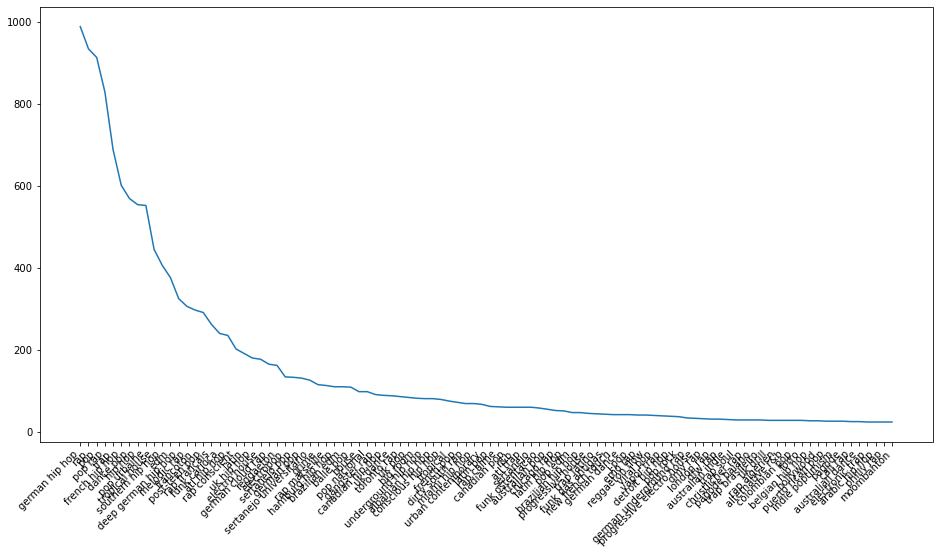

In [45]:
# printing value counts of genre_list of artist 1 to determine how many genres to take 
a1_sorted_keys = sorted(genre_counts, key=genre_counts.get, reverse=True)
import matplotlib.pyplot as plt
d={}
for r in a1_sorted_keys:
    d[r]=genre_counts[r]
d_out = dict(list(d.items())[0: 100]) 
plt.figure(figsize=(16,8))
plt.plot(list(d_out.keys()), list(d_out.values()))
plt.xticks(rotation=45, ha='right')
plt.show()
# decided to take the first 15 values, becuase after that the count reduces drastically and remains stagnant. 
# All the other values will be marked as "Others"

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer


In [47]:
# Step 2: Identify top 10 genres and categorize the rest as "Others"
top_genres = [genre for genre, count in sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:16]]
cat_preprocessing_df['top_genres'] = cat_preprocessing_df['genres_artist1'].apply(lambda x: [genre if genre in top_genres else 'Others' for genre in x])

# Step 3: One-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(cat_preprocessing_df['top_genres'])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns="artist1_"+mlb.classes_)

# Combine the one-hot encoded data with the original DataFrame
cat_preprocessing_df = pd.concat([cat_preprocessing_df, one_hot_encoded_df], axis=1)

cat_preprocessing_df

,song_popularity,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house
0,58,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0,"[Others, Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0,"[Others, Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,61,True,12,2,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0,"[melodic rap, rap, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,58,True,15,3,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0,"[melodic rap, rap, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,41,True,6,3,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0,"[deep german hip hop, german hip hop]",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,3,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,0,0,0,"[Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5175,54,False,1,2,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",2017,6,2,0,0,0,"[Others, Others, Others, Others, Others, tropi...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5176,2,False,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,0,0,0,"[Others, Others, Others, tropical house]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5177,20,False,1,2,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",2018,12,21,0,0,0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### For Artist 2

In [48]:
genre_counts = {}
for genres_list in cat_preprocessing_df['genres_artist2']:
    for genre in genres_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

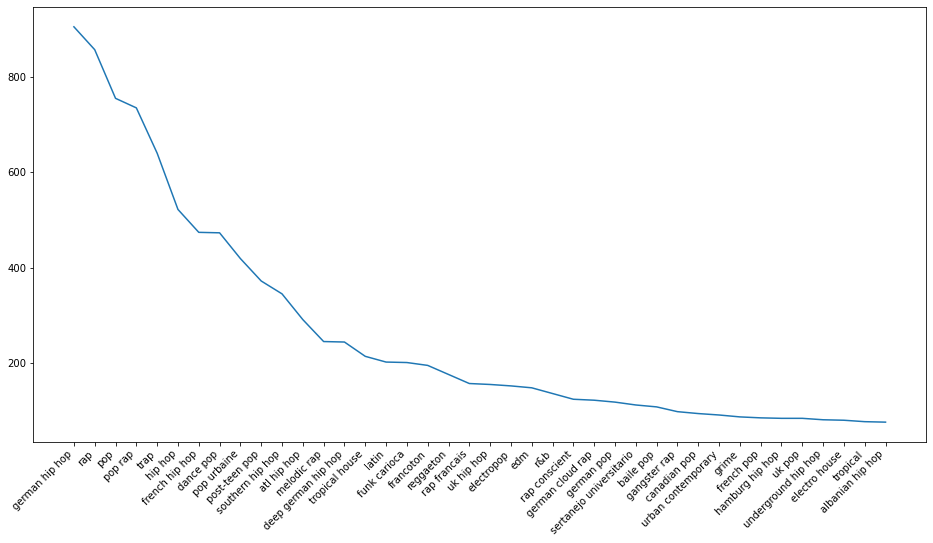

In [49]:
# printing value counts of genre_list of artist 1 to determine how many genres to take 
a1_sorted_keys = sorted(genre_counts, key=genre_counts.get, reverse=True)
import matplotlib.pyplot as plt
d={}
for r in a1_sorted_keys:
    d[r]=genre_counts[r]
d_out = dict(list(d.items())[0: 40]) 
plt.figure(figsize=(16,8))
plt.plot(list(d_out.keys()), list(d_out.values()))
plt.xticks(rotation=45, ha='right')
plt.show()
# decided to take the first 15 values, becuase after that the count reduces drastically and remains stagnant. 
# All the other values will be marked as "Others"

In [50]:
# Step 2: Identify top 10 genres and categorize the rest as "Others"
top_genres = [genre for genre, count in sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:16]]
cat_preprocessing_df['top_genres'] = cat_preprocessing_df['genres_artist2'].apply(lambda x: [genre if genre in top_genres else 'Others' for genre in x])

# Step 3: One-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(cat_preprocessing_df['top_genres'])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns="artist2_"+mlb.classes_)

# Combine the one-hot encoded data with the original DataFrame
cat_preprocessing_df = pd.concat([cat_preprocessing_df, one_hot_encoded_df], axis=1)

cat_preprocessing_df

,song_popularity,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house
0,58,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
1,47,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,61,True,12,2,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
3,58,True,15,3,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
4,41,True,6,3,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,3,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,0,0,0,[],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5175,54,False,1,2,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",2017,6,2,0,0,0,"[Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5176,2,False,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,0,0,0,"[Others, Others, Others]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0

In [51]:
# One hot encoding for explicit column
cat_preprocessing_df = pd.get_dummies(cat_preprocessing_df, columns = ['explicit']) 
cat_preprocessing_df.head()

,song_popularity,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house,explicit_False,explicit_True
0,58,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,47,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
2,61,12,2,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,58,15,3,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
4,41,6,3,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0,"[Others, melodic rap, pop rap, rap, Others, trap]",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1


In [52]:
cat_preprocessing_df.drop(columns=["artist_1","artist_2","genres_artist1","genres_artist2","top_genres"],axis=1, inplace=True)

In [53]:
cat_preprocessing_df

,song_popularity,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house,explicit_False,explicit_True
0,58,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,100203,69,2905370,88,2019,6,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,47,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,100203,69,2905370,88,2019,6,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
2,61,12,2,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,4543729,89,2905370,88,2019,11,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,58,15,3,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,4543729,89,2905370,88,2018,11,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
4,41,6,3,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,146136,72,2905370,88,2017,3,24,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,1,3,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,62590,57,5132,48,2019,2,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5175,54,1,2,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,268970,70,254939,63,2017,6,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5176,2,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,186798,59,56258,49,2016,6,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5177,20,1,2,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,629,13,1977867,66,2018,12,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
cat_preprocessing_df.dtypes

song_popularity             object
track_number                object
num_artists                 object
num_available_markets       object
duration_ms                 object
                             ...  
artist2_southern hip hop     int64
artist2_trap                 int64
artist2_tropical house       int64
explicit_False               uint8
explicit_True                uint8
Length: 63, dtype: object

In [55]:
cat_preprocessing_df = cat_preprocessing_df.apply(pd.to_numeric, errors='coerce')
cat_preprocessing_df.dtypes

song_popularity             int64
track_number                int64
num_artists                 int64
num_available_markets       int64
duration_ms                 int64
                            ...  
artist2_southern hip hop    int64
artist2_trap                int64
artist2_tropical house      int64
explicit_False              uint8
explicit_True               uint8
Length: 63, dtype: object

In [56]:
cat_preprocessing_df

,song_popularity,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers_artist1,popularity_artist1,followers_artist2,popularity_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,artist1_Others,artist1_dance pop,artist1_deep german hip hop,artist1_edm,artist1_francoton,artist1_french hip hop,artist1_german hip hop,artist1_hip hop,artist1_melodic rap,artist1_pop,artist1_pop rap,artist1_pop urbaine,artist1_post-teen pop,artist1_rap,artist1_southern hip hop,artist1_trap,artist1_tropical house,artist2_Others,artist2_atl hip hop,artist2_dance pop,artist2_deep german hip hop,artist2_french hip hop,artist2_german hip hop,artist2_hip hop,artist2_latin,artist2_melodic rap,artist2_pop,artist2_pop rap,artist2_pop urbaine,artist2_post-teen pop,artist2_rap,artist2_southern hip hop,artist2_trap,artist2_tropical house,explicit_False,explicit_True
0,58,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0000,0.0659,-6.751,0.2880,0.492,123.539,100203,69,2905370,88,2019,6,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
1,47,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0000,0.0659,-6.751,0.2880,0.492,123.539,100203,69,2905370,88,2019,6,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
2,61,12,2,79,193933,5,1,4,0.1740,0.780,0.679,0.0000,0.1270,-4.554,0.0881,0.470,139.978,4543729,89,2905370,88,2019,11,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,58,15,3,79,185828,7,1,4,0.5670,0.678,0.477,0.0000,0.1100,-9.626,0.0836,0.481,92.963,4543729,89,2905370,88,2018,11,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
4,41,6,3,76,224967,2,1,5,0.0275,0.405,0.653,0.0000,0.0641,-6.030,0.0677,0.208,146.991,146136,72,2905370,88,2017,3,24,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,1,3,79,163246,5,0,4,0.2400,0.764,0.468,0.0000,0.2520,-9.181,0.4460,0.756,77.044,62590,57,5132,48,2019,2,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5175,54,1,2,76,201240,6,1,4,0.4480,0.767,0.862,0.0000,0.0806,-3.157,0.0799,0.767,125.997,268970,70,254939,63,2017,6,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5176,2,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.1110,-8.136,0.0376,0.184,96.008,186798,59,56258,49,2016,6,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5177,20,1,2,79,178316,6,1,4,0.3080,0.603,0.900,0.0000,0.5070,-3.079,0.0792,0.861,156.193,629,13,1977867,66,2018,12,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [57]:
# Standardizing numerical features
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the data
preprocessing_df_numerical = ss.fit_transform(cat_preprocessing_df)
preprocessing_df_numerical

array([[ 0.4618238 , -0.76942064, -0.43439826, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.00791193, -0.76942064, -0.43439826, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.58561795,  1.46890467, -0.43439826, ..., -0.20760952,
        -0.86890638,  0.86890638],
       ...,
       [-1.84900029, -0.56593652, -0.43439826, ..., -0.20760952,
         1.15087197, -1.15087197],
       [-1.1062354 , -0.76942064, -0.43439826, ..., -0.20760952,
         1.15087197, -1.15087197],
       [ 0.17297079,  1.06193643, -0.43439826, ..., -0.20760952,
         1.15087197, -1.15087197]])

In [58]:
preprocessing_df_numerical

array([[ 0.4618238 , -0.76942064, -0.43439826, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.00791193, -0.76942064, -0.43439826, ..., -0.20760952,
        -0.86890638,  0.86890638],
       [ 0.58561795,  1.46890467, -0.43439826, ..., -0.20760952,
        -0.86890638,  0.86890638],
       ...,
       [-1.84900029, -0.56593652, -0.43439826, ..., -0.20760952,
         1.15087197, -1.15087197],
       [-1.1062354 , -0.76942064, -0.43439826, ..., -0.20760952,
         1.15087197, -1.15087197],
       [ 0.17297079,  1.06193643, -0.43439826, ..., -0.20760952,
         1.15087197, -1.15087197]])

In [59]:
# ideating
import pandas as pd
from collections import Counter

# Sample data
artist_data = {'artist': ['Artist1', 'Artist2', 'Artist3'],
               'genres': [['trap soul', 'uk drill', 'uk hip hop','grime'],
                          ['trap soul', 'uk hip hop', 'grime'],
                          ['uk hip hop', 'grime']]}

# Genre to modularity class mapping
genre_modularity_mapping = {'trap soul': 5, 'uk drill': 5, 'uk hip hop': 5}#, 'grime': 0}

# Create the first dataframe
df_artists_test = pd.DataFrame(artist_data)

def calculate_modularity_class(genre_list):
    modularity_counts = Counter([genre_modularity_mapping.get(genre, -1) for genre in genre_list])
    
    # Get the modularity class with the maximum count
    max_count = max(modularity_counts.values(), default=0)
    
    # If there's a tie or no majority, choose the first modularity class
    modularity_class = [mod_class for mod_class, count in modularity_counts.items() if count == max_count]
    
    return modularity_class[0]

# Apply the function to each row
df_artists_test['modularity_class'] = df_artists_test['genres'].apply(calculate_modularity_class)

# Display the resulting dataframe
print(df_artists_test)

    artist                                    genres  modularity_class
0  Artist1  [trap soul, uk drill, uk hip hop, grime]                 5
1  Artist2            [trap soul, uk hip hop, grime]                 5
2  Artist3                       [uk hip hop, grime]                 5


In [60]:
import csv

reader = csv.DictReader(open('node-table-modularity_class_8.csv'))
genre_modularity_mapping={}
for row in reader:
    genre_modularity_mapping[row['Label']] = int(row['modularity_class'])
print(genre_modularity_mapping)

{'latin': 0, 'reggaeton': 0, 'pop rap': 1, 'rap': 1, 'trap': 1, 'hip hop': 1, 'tropical': 0, 'trap latino': 0, 'pop': 2, 'dance pop': 2, 'reggaeton flow': 0, 'post-teen pop': 2, 'latin hip hop': 0, 'tropical house': 2, 'southern hip hop': 1, 'underground hip hop': 1, 'melodic rap': 1, 'edm': 2, 'electropop': 2, 'atl hip hop': 1, 'trap argentino': 0, 'panamanian pop': 0, 'latin pop': 0, 'colombian pop': 0, 'german hip hop': 3, 'r&b en espanol': 0, 'vapor trap': 1, 'nc hip hop': 1, 'atl trap': 1, 'puerto rican pop': 0, 'uk pop': 2, 'miami hip hop': 1, 'conscious hip hop': 1, 'electro house': 2, 'uk dance': 2, 'deep german hip hop': 3, 'gangster rap': 1, 'r&b': 1, 'canadian pop': 1, 'cali rap': 1, 'rap latina': 0, 'pop reggaeton': 0, 'house': 2, 'canadian hip hop': 1, 'trap soul': 1, 'baile pop': 0, 'funk carioca': 0, 'dirty south rap': 1, 'toronto rap': 1, 'dfw rap': 1, 'moombahton': 2, 'queens hip hop': 1, 'big room': 2, 'argentine hip hop': 0, 'alternative r&b': 2, 'bmore': 2, 'ninja':

In [61]:
preprocessing_df

,song_popularity,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres
0,58,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0,"[Others, Others, Others]"
1,47,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0,"[Others, Others, Others]"
2,61,True,12,2,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0,"[melodic rap, rap, trap]"
3,58,True,15,3,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0,"[melodic rap, rap, trap]"
4,41,True,6,3,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0,"[deep german hip hop, german hip hop]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,3,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,0,0,0,"[Others, Others]"
5175,54,False,1,2,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",2017,6,2,0,0,0,"[Others, Others, Others, Others, Others, tropi..."
5176,2,False,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,0,0,0,"[Others, Others, Others, tropical house]"
5177,20,False,1,2,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",2018,12,21,0,0,0,[]


In [62]:
def calculate_modularity_class(genre_list):
    modularity_counts = Counter([genre_modularity_mapping.get(genre, -1) for genre in genre_list])
    
    # Get the modularity class with the maximum count
    max_count = max(modularity_counts.values(), default=0)
    
    # If there's a tie or no majority, choose the first modularity class
    modularity_class = [mod_class for mod_class, count in modularity_counts.items() if count == max_count]
    
    # If there's a tie, choose the first modularity class
    if len(modularity_class) > 1:
        return modularity_class[0]
    else:
        # If there's no majority, choose the one that is not -1
        for mod_class in modularity_class:
            if mod_class != -1:
                return mod_class
        
        # If all are -1, return -1
        return -1

# Apply the function to each row
preprocessing_df['modularity_class_artist1'] = preprocessing_df['genres_artist1'].apply(calculate_modularity_class)
preprocessing_df['modularity_class_artist2'] = preprocessing_df['genres_artist2'].apply(calculate_modularity_class)

# Display the resulting dataframe
preprocessing_df

,song_popularity,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,modularity_class_artist1,modularity_class_artist2
0,58,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,0,0,0,"[Others, Others, Others]",1,1
1,47,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,0,0,0,"[Others, Others, Others]",1,1
2,61,True,12,2,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,0,0,0,"[melodic rap, rap, trap]",1,1
3,58,True,15,3,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,0,0,0,"[melodic rap, rap, trap]",1,1
4,41,True,6,3,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,0,0,0,"[deep german hip hop, german hip hop]",3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,3,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,0,0,0,"[Others, Others]",-1,-1
5175,54,False,1,2,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",2017,6,2,0,0,0,"[Others, Others, Others, Others, Others, tropi...",2,2
5176,2,False,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,0,0,0,"[Others, Others, Others, tropical house]",-1,-1
5177,20,False,1,2,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",2018,12,21,0,0,0,[],-1,0


In [63]:
preprocessing_df[preprocessing_df["modularity_class_artist2"]==-1]

,song_popularity,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,release_date_hour,release_date_minute,release_date_second,top_genres,modularity_class_artist1,modularity_class_artist2
48,50,True,13,2,79,728413,10,1,4,0.154,0.529,0.799,0.0,0.0858,-7.025,0.166,0.354,104.054,Logic,Neil deGrasse Tyson,4587917,84,"[conscious hip hop, dmv rap, hip hop, pop rap,...",5078,37,[],2017,5,5,0,0,0,"[Others, Others, hip hop, pop rap, rap]",1,-1
49,55,True,5,2,79,198106,10,1,4,0.139,0.546,0.871,0.000083,0.104,-5.81,0.148,0.303,189.723,Logic,Ryan Tedder,4587917,84,"[conscious hip hop, dmv rap, hip hop, pop rap,...",19685,61,[],2018,9,28,0,0,0,"[Others, Others, hip hop, pop rap, rap]",1,-1
50,53,True,1,2,79,199866,10,1,4,0.118,0.529,0.871,0.000164,0.115,-5.831,0.155,0.272,189.837,Logic,Ryan Tedder,4587917,84,"[conscious hip hop, dmv rap, hip hop, pop rap,...",19685,61,[],2018,7,27,0,0,0,"[Others, Others, hip hop, pop rap, rap]",1,-1
51,62,True,12,2,79,331266,1,1,4,0.111,0.622,0.867,0.000104,0.346,-5.298,0.0893,0.339,140.011,Logic,Damian Lemar Hudson,4587917,84,"[conscious hip hop, dmv rap, hip hop, pop rap,...",3570,48,[],2017,5,5,0,0,0,"[Others, Others, hip hop, pop rap, rap]",1,-1
68,52,True,11,4,79,260213,2,1,4,0.0898,0.626,0.852,0.0,0.354,-6.261,0.303,0.731,94.905,Logic,Kajo,4587917,84,"[conscious hip hop, dmv rap, hip hop, pop rap,...",142,37,[],2018,9,28,0,0,0,"[Others, Others, hip hop, pop rap, rap]",1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,52,True,6,2,79,244687,6,0,4,0.484,0.711,0.735,0.0,0.34,-8.038,0.0943,0.668,128.064,Alligatoah,Felix Brummer,793181,68,"[deep german hip hop, german pop]",895,40,[],2018,9,14,0,0,0,"[deep german hip hop, Others]",3,-1
5171,4,False,1,3,0,194621,8,0,4,0.241,0.702,0.67,0.000012,0.202,-7.288,0.111,0.51,118.987,SRTW,Charity Children,7171,59,"[pop edm, tropical house]",5761,46,[german indie],2016,11,25,0,0,0,"[Others, tropical house]",2,-1
5174,62,True,1,3,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,0,0,0,"[Others, Others]",-1,-1
5176,2,False,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,0,0,0,"[Others, Others, Others, tropical house]",-1,-1


In [65]:
preprocessing_df.drop(columns=["release_date_minute","release_date_hour","release_date_second","top_genres"],axis=1,inplace=True)

In [66]:
preprocessing_df

,song_popularity,explicit,track_number,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_1,artist_2,followers_artist1,popularity_artist1,genres_artist1,followers_artist2,popularity_artist2,genres_artist2,release_date_year,release_date_month,release_date_day,modularity_class_artist1,modularity_class_artist2
0,58,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,21,1,1
1,47,True,1,2,79,192000,8,0,3,0.0209,0.614,0.641,0.0,0.0659,-6.751,0.288,0.492,123.539,Nafe Smallz,Tory Lanez,100203,69,"[trap soul, uk drill, uk hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,6,13,1,1
2,61,True,12,2,79,193933,5,1,4,0.174,0.78,0.679,0.0,0.127,-4.554,0.0881,0.47,139.978,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2019,11,22,1,1
3,58,True,15,3,79,185828,7,1,4,0.567,0.678,0.477,0.0,0.11,-9.626,0.0836,0.481,92.963,Trippie Redd,Tory Lanez,4543729,89,"[melodic rap, rap, trap]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2018,11,9,1,1
4,41,True,6,3,76,224967,2,1,5,0.0275,0.405,0.653,0.0,0.0641,-6.03,0.0677,0.208,146.991,Maxwell,Tory Lanez,146136,72,"[deep german hip hop, german hip hop]",2905370,88,"[canadian hip hop, melodic rap, pop rap, rap, ...",2017,3,24,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,62,True,1,3,79,163246,5,0,4,0.24,0.764,0.468,0.0,0.252,-9.181,0.446,0.756,77.044,Neo Beats,Calibre 2.1,62590,57,"[brazilian hip hop, trap brasileiro]",5132,48,[],2019,2,21,-1,-1
5175,54,False,1,2,76,201240,6,1,4,0.448,0.767,0.862,0.0,0.0806,-3.157,0.0799,0.767,125.997,Bakermat,Kiesza,268970,70,"[deep euro house, deep house, deep tropical ho...",254939,63,"[electropop, pop edm]",2017,6,2,2,2
5176,2,False,2,2,0,212693,9,0,4,0.0395,0.757,0.545,0.0551,0.111,-8.136,0.0376,0.184,96.008,Fakear,Rae Morris,186798,59,"[french indie pop, french indietronica, new fr...",56258,49,"[art pop, gauze pop, neo-singer-songwriter]",2016,6,3,-1,-1
5177,20,False,1,2,79,178316,6,1,4,0.308,0.603,0.9,0.0,0.507,-3.079,0.0792,0.861,156.193,Fernanda Salgado,Mano Walter,629,13,[],1977867,66,"[forro, sertanejo pop, sertanejo universitario]",2018,12,21,-1,0


In [67]:
preprocessing_df.columns

Index(['song_popularity', 'explicit', 'track_number', 'num_artists',
       'num_available_markets', 'duration_ms', 'key', 'mode', 'time_signature',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'artist_1',
       'artist_2', 'followers_artist1', 'popularity_artist1', 'genres_artist1',
       'followers_artist2', 'popularity_artist2', 'genres_artist2',
       'release_date_year', 'release_date_month', 'release_date_day',
       'modularity_class_artist1', 'modularity_class_artist2'],
      dtype='object')

In [68]:
preprocessing_df = preprocessing_df.apply(pd.to_numeric, errors='coerce')
preprocessing_df.dtypes

song_popularity               int64
explicit                       bool
track_number                  int64
num_artists                   int64
num_available_markets         int64
duration_ms                   int64
key                           int64
mode                          int64
time_signature                int64
acousticness                float64
danceability                float64
energy                      float64
instrumentalness            float64
liveness                    float64
loudness                    float64
speechiness                 float64
valence                     float64
tempo                       float64
artist_1                    float64
artist_2                    float64
followers_artist1             int64
popularity_artist1            int64
genres_artist1              float64
followers_artist2             int64
popularity_artist2            int64
genres_artist2              float64
release_date_year             int64
release_date_month          

# Feature Selection

In [85]:
# CORRELATION BETWEEN VARIABLES
import pandas as pd

# Load your dataframe (assuming it's named df)
# df = pd.read_csv('your_dataframe.csv')

# Calculate correlation matrix
correlation_matrix = preprocessing_df.corr()

# Calculate absolute correlation with the target variable
correlation_with_target = correlation_matrix['song_popularity'].abs()

# Sort the features by their correlation with the target variable in descending order
sorted_features = correlation_with_target.sort_values(ascending=False)

# Print the significant features
print("Significant features based on correlation with song_popularity:")
print(sorted_features)

Significant features based on correlation with song_popularity:
song_popularity             1.000000
num_available_markets       0.781664
popularity_artist1          0.220431
popularity_artist2          0.218334
followers_artist1           0.121132
followers_artist2           0.119330
modularity_class_artist1    0.117966
release_date_year           0.104251
num_artists                 0.073635
modularity_class_artist2    0.067139
release_date_month          0.055866
energy                      0.055411
speechiness                 0.043801
explicit                    0.037870
danceability                0.023019
duration_ms                 0.022961
track_number                0.021812
valence                     0.020589
release_date_day            0.019353
time_signature              0.016613
tempo                       0.012381
instrumentalness            0.010278
key                         0.009808
mode                        0.009771
loudness                    0.008029
liveness   

In [84]:
# FEATURE SELECTION using RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your dataframe (assuming it's named df)
# df = pd.read_csv('your_dataframe.csv')

# Assuming X contains the features and y contains the target variable
# Replace these with your actual feature and target variable
X = preprocessing_df.drop(columns=['song_popularity',"artist_1","artist_2","genres_artist1","genres_artist2"], axis=1)  # Features
y = preprocessing_df['song_popularity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Initialize RFE
# Specify the number of features to select (e.g., 15 in this example)
num_features_to_select = 15
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)


# Fit RFE and get the selected features
fit = rfe.fit(X_train, y_train)

print("Selected Features:")
selected_features = X.columns[fit.support_]
print(selected_features)

# Print the feature ranking in descending order
print("Feature Ranking (Descending Order):")
feature_ranking = sorted(list(zip(X.columns, fit.ranking_)), key=lambda x: x[1], reverse=True)
for feature, rank in feature_ranking:
    print(f"Feature: {feature}, Rank: {rank}")

Selected Features:
Index(['explicit', 'track_number', 'num_artists', 'num_available_markets',
       'mode', 'time_signature', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'valence', 'popularity_artist1',
       'modularity_class_artist1', 'modularity_class_artist2'],
      dtype='object')
Feature Ranking (Descending Order):
Feature: followers_artist1, Rank: 12
Feature: followers_artist2, Rank: 11
Feature: duration_ms, Rank: 10
Feature: loudness, Rank: 9
Feature: tempo, Rank: 8
Feature: key, Rank: 7
Feature: release_date_day, Rank: 6
Feature: danceability, Rank: 5
Feature: release_date_year, Rank: 4
Feature: popularity_artist2, Rank: 3
Feature: release_date_month, Rank: 2
Feature: explicit, Rank: 1
Feature: track_number, Rank: 1
Feature: num_artists, Rank: 1
Feature: num_available_markets, Rank: 1
Feature: mode, Rank: 1
Feature: time_signature, Rank: 1
Feature: acousticness, Rank: 1
Feature: energy, Rank: 1
Feature: instrumentalness, Rank: 1
Feature: 

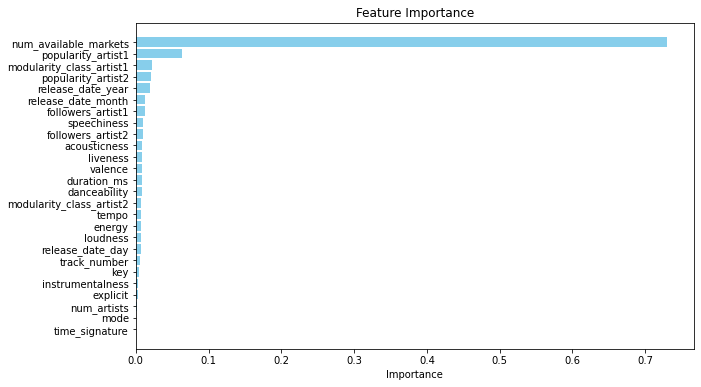

Feature Importance:
                     Feature  Importance
3      num_available_markets    0.730303
18        popularity_artist1    0.063522
24  modularity_class_artist1    0.021714
20        popularity_artist2    0.020947
21         release_date_year    0.019643
22        release_date_month    0.013131
17         followers_artist1    0.012993
14               speechiness    0.010360
19         followers_artist2    0.010041
8               acousticness    0.008631
12                  liveness    0.008492
15                   valence    0.008378
4                duration_ms    0.007992
9               danceability    0.007826
25  modularity_class_artist2    0.007697
16                     tempo    0.007686
10                    energy    0.007224
13                  loudness    0.007066
23          release_date_day    0.006938
1               track_number    0.005517
5                        key    0.004296
11          instrumentalness    0.003667
0                   explicit    0.002

In [83]:
# random forest feature importance

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Initialize the model (Random Forest Regressor)
randome_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
randome_forest_model.fit(X, y)

# Get feature importances
feature_importances = randome_forest_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.show()

# Print feature importances
print("Feature Importance:")
print(feature_importance_df)

# Model Training

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model (Linear Regression)
linear_regression_model = LinearRegression()

# Fit the model
linear_regression_model.fit(X_train_scaled, y_train)

# Predict using the model
y_pred = linear_regression_model.predict(X_test_scaled)

# Calculate mean squared error and R-squared
mse_linear_regression = mean_squared_error(y_test, y_pred)
r2_linear_regression = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error of the linear regression model:", mse_linear_regression)
print("R-squared of the linear regression model:", r2_linear_regression)

# Calculate adjusted R-squared
n = len(y_test)
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2_linear_regression) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error of the linear regression model: 187.34846619148632
R-squared of the linear regression model: 0.6593530742061959
Adjusted R-squared: 0.6505752545127976


In [78]:
pip install xgboost


[notice] A new release of pip is available: 23.1 -> 23.3
[notice] To update, run: /Users/anushkavuppala/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [81]:
# XGBOOST

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model (Decision Tree Regressor)
xgboost_model = XGBRegressor(random_state=42)

# Fit the model
decision_trees_model.fit(X_train, y_train)

# Predict using the model
y_pred = decision_trees_model.predict(X_test)

# Calculate mean squared error and R-squared
mse_decision_trees = mean_squared_error(y_test, y_pred)
r2_decision_trees = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error of the decision trees model:", mse_decision_trees)
print("R-squared of the decision trees model:", r2_decision_trees)

n = len(y_test)
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2_decision_trees) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error of the decision trees model: 81.22565659925309
R-squared of the decision trees model: 0.8523111996666235
Adjusted R-squared: 0.8485055417789448


In [82]:
y_test.shape

(1036,)